In [66]:
import pickle
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [55]:
import sys
sys.path.append('./../Scripts/core/')
import inv_flux as invf

In [56]:
CAMS = pickle.load(open('./../Output/output_raw/output_all/CAMS_all/year.pik', 'rb'))
CAMS

<xarray.Dataset>
Dimensions:         (time: 39)
Coordinates:
  * time            (time) object 1979-12-30 00:00:00 ... 2017-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -0.3236 -0.2909 -1.424 ... -2.248 -3.845
    South_Land      (time) float64 -0.06017 0.09 0.05536 ... 0.08921 0.08088
    Tropical_Land   (time) float64 2.072 1.62 0.4356 ... 0.824 0.6507 -1.083
    North_Land      (time) float64 -2.335 -2.001 -1.915 ... -2.95 -2.988 -2.843
    Earth_Ocean     (time) float64 -1.054 -1.139 -1.101 ... -1.933 -2.067 -2.189
    South_Ocean     (time) float64 -0.9933 -1.133 -1.017 ... -1.448 -1.562
    Tropical_Ocean  (time) float64 0.8567 0.8374 0.8029 ... 0.4387 0.3609 0.3218
    North_Ocean     (time) float64 -0.9174 -0.8442 -0.8868 ... -0.9797 -0.9491

In [57]:
uptake = CAMS['South_Land'].values

In [87]:
time = np.array([year.year for year in CAMS.time.values])

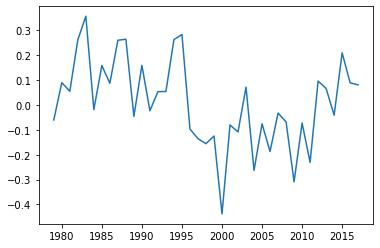

In [88]:
plt.plot(time, uptake)

In [89]:
def extract_uptake(sink, region):
    
    """
    sink: Land or Ocean
    region: South, Tropical or North
    """
    
    uptake = f"{region}_{sink}"
    
    x = [year.year for year in CAMS.time.values]
    y = CAMS[uptake].values
    
    return (x,y)

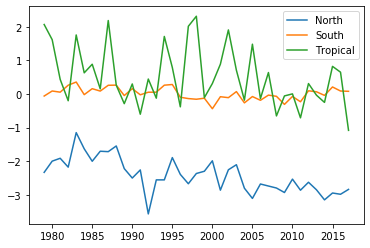

In [90]:
NL = extract_uptake("Land", "North")
SL = extract_uptake("Land", "South")
TL = extract_uptake("Land", "Tropical")

plt.plot(NL[0], NL[1])
plt.plot(SL[0], SL[1])
plt.plot(TL[0], TL[1])
plt.legend(["North", "South", "Tropical"])

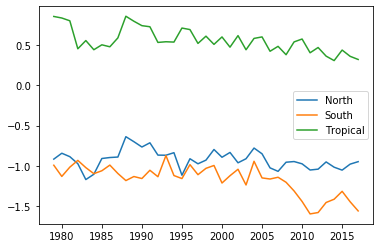

In [91]:
NO = extract_uptake("Ocean", "North")
SO = extract_uptake("Ocean", "South")
TO = extract_uptake("Ocean", "Tropical")

plt.plot(NO[0], NO[1])
plt.plot(SO[0], SO[1])
plt.plot(TO[0], TO[1])
plt.legend(["North", "South", "Tropical"])

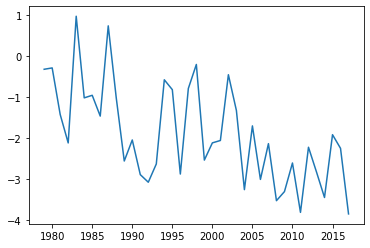

In [96]:
el = CAMS.Earth_Land.values
plt.plot(time, el)

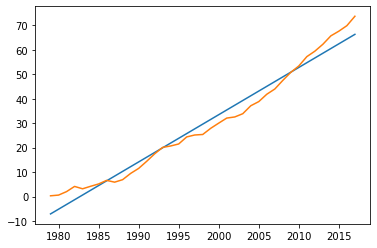

In [93]:
t = stats.linregress(time, uptake_cumsum)
plt.plot(time, t[0]*time + t[1])
plt.plot(time, uptake_cumsum)